# Лабораторная работа - Корреляционный анализ в Python


### Цели

* Часть 1: Набор данных
* Часть 2: Диаграммы рассеяния и корреляционные переменные
* Часть 3: Расчёт корреляции с Python
* Часть 4: Визуализация

### История / Cценарий

Корреляция является важной статистической зависимостью, которая может указывать, связаны ли линейные значения переменных.

В этой лабораторной работе вы узнаете, как использовать Python для расчета корреляции. В Части 1 Вы подготовите набор данных. В Части 2 Вы узнаете, как определить, являются ли переменные в данном наборе данных взаимозависимыми. Наконец, в Части 3, Вы будете использовать Python для вычисления корреляции между двумя наборами переменных.

### Необходимо:
* Библиотеки Python: pandas, numpy, matplotlib, seaborn
* Файл данных: brainsize.txt

## Часть 1: Набор данных

Вы будете использовать набор данных, который содержит выборку 40 студентов правшей с вводного курса по Психологии из университета Southwestern. Испытуемые прошли четыре субтеста (Vocabulary, Similarities, Block Design, и Picture Completion) для расчёта шкалы интеллекта взрослых по Векслеру. Исследователи использовали магнитно-резонансную томографию (МРТ) для определения размера мозга у субъектов. Также включены сведения о гендерных показателях и размере тела (рост и вес). Исследователи скрыли вес двух испытуемых и высоту одного из них по причинам конфиденциальности.
Для набора данных были применены две простые модификации:

1. Заменены вопросительные знаки, используемые для представления скрытых данных, описанных выше, строкой «NaN». Замена была выполнена, потому что Pandas не обрабатывает вопросительные знаки правильно.

2. Заменены все символы табуляции запятыми, преобразуя набор данных в набор данных CSV.

Готовый набор данных сохранён как `brainsize.txt`.

#### Шаг 1: Загрузка набора данных из файла.

До того, как набор данных можно использовать, он должен быть загружен в память.

В приведенном ниже коде первая строка импортирует модули `pandas` и определяет `pd` как дескриптор, который ссылается на один из модулей.

Вторая строка загружает CSV-файл набора данных в переменную с именем `brainFile`.

Третья строка использует метод `read_csv()` из библиотеки `pandas`, чтобы преобразовать набор данных CSV, хранящийся в `brainFile` в кадр данных. Затем кадр данных хранится в переменной `brainFrame`.

Запустите ячейку ниже, чтобы выполнить описанные функции.

In [4]:
import pandas as pd  # Импортируем библиотеку pandas и обозначаем ее как pd

# Загружаем CSV-файл набора данных в переменную brainFile
brainFile = 'brainsize.txt'  # Укажите путь к вашему файлу, если он находится в другой директории

# Используем метод read_csv() для преобразования набора данных CSV в DataFrame
brainFrame = pd.read_csv(brainFile, delimiter=',')  # Используем запятую как разделитель

# Выводим первые 5 строк DataFrame для проверки загрузки
print(brainFrame.head())



  Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
0          Female\t133\t132\t124\t118\t64.5\t816932
1            Male\t140\t150\t124\tNA\t72.5\t1001121
2           Male\t139\t123\t150\t143\t73.3\t1038437
3            Male\t133\t129\t128\t172\t68.8\t965353
4          Female\t137\t132\t134\t147\t65.0\t951545


#### Шаг 2. Проверка кадра данных.

Чтобы убедиться, что кадр данных правильно загружен и создан, используйте метод `head()`. Метод `head()` отображает первые пять записей в кадре данных.

In [5]:
# Выводим первые 5 строк DataFrame для проверки загрузки
print(brainFrame.head())


  Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
0          Female\t133\t132\t124\t118\t64.5\t816932
1            Male\t140\t150\t124\tNA\t72.5\t1001121
2           Male\t139\t123\t150\t143\t73.3\t1038437
3            Male\t133\t129\t128\t172\t68.8\t965353
4          Female\t137\t132\t134\t147\t65.0\t951545


Метод head() принимает параметр - число строк, отобразите первые 10 строк таблицы

In [8]:
# Выводим первые 10 строк DataFrame для проверки загрузки
print(brainFrame.head(10))


  Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
0          Female\t133\t132\t124\t118\t64.5\t816932
1            Male\t140\t150\t124\tNA\t72.5\t1001121
2           Male\t139\t123\t150\t143\t73.3\t1038437
3            Male\t133\t129\t128\t172\t68.8\t965353
4          Female\t137\t132\t134\t147\t65.0\t951545
5            Female\t99\t90\t110\t146\t69.0\t928799
6          Female\t138\t136\t131\t138\t64.5\t991305
7             Female\t92\t90\t98\t175\t66.0\t854258
8               Male\t89\t93\t84\t134\t66.3\t904858
9            Male\t133\t114\t147\t172\t68.8\t955466


Также Dataframe имеет метод tail(), который возвращает последние 5 строк кадра данных. Аналогично head() метод tail() принимает аргументом число строк, которые он вернет. Отобразите последние 8 строк таблицы.

In [9]:
# Выводим последние 8 строк DataFrame для проверки загрузки
print(brainFrame.tail(8))


   Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
32             Male\t103\t96\t110\t192\t75.5\t997925
33               Male\t90\t96\t86\t181\t69.0\t879987
34             Female\t83\t90\t81\t143\t66.5\t834344
35          Female\t133\t129\t128\t153\t66.5\t948066
36            Male\t140\t150\t124\t144\t70.5\t949395
37             Female\t88\t86\t94\t139\t64.5\t893983
38               Male\t81\t90\t74\t148\t74.0\t930016
39               Male\t89\t91\t89\t179\t75.5\t935863


## Часть 2: Диаграммы рассеяния и корреляционные переменные

#### Шаг 1: метод `describe()` в библиотеке pandas.
Библиотека pandas включает в себя метод `describe()`, который выполняет одни и те же общие вычисления на предложенном наборе данных. Помимо базовых операций таких, как подсчёт, расчёт среднего значения, расчёт среднеквадратического отклонения, расчёт минимума, и максимума,  `describe()` также отличный способ быстро проверить достоверность значений в кадре данных.<p>
Ниже используйте функцию describe, для вывода статистики по данным

In [20]:
# Выводим статистику по данным в DataFrame
print(brainFrame.describe())


       Gender\tFSIQ\tVIQ\tPIQ\tWeight\tHeight\tMRI_Count
count                                                 40
unique                                                40
top             Female\t133\t132\t124\t118\t64.5\t816932
freq                                                   1


#### Шаг 2: Диаграммы рассеяния

Диаграммы рассеяния важны при работе с корреляциями, поскольку они позволяют быстро визуально проверить природу связи между переменными. В этой лабораторной работе используется коэффициент корреляции Пирсона, который чувствителен только к линейной зависимости между двумя переменными. Также существуют другие более надежные методы корреляции, но они выходят за рамки этой лабораторной работы.

##### a. Загрузите необходимые модули.
Прежде чем строить графики, необходимо импортировать несколько модулей, а именно `numpy` и `matplotlib`. Запустите ячейку ниже, чтобы загрузить эти модули.

In [29]:
import numpy as np
import matplotlib.pyplot as plt


##### b. Разделите данные.
Чтобы гарантировать, что результаты не будут искажены из-за различий в мужских и женских телах, кадр данных разбит на два: один содержит все мужские записи, а другой - только женские экземпляры. <p>
Создайте два новых кадра данных: menDf и womenDf, каждый из которых содержит соответствующие записи.

In [84]:

menDf = brainFrame[brainFrame['Gender'] == 'Male']
womenDf = brainFrame[brainFrame['Gender'] == 'Female']

TypeError: string indices must be integers

##### c. Постройте графики.
Поскольку набор данных включает в себя три различных измерения интеллекта (PIQ, FSIQ и VIQ), первая строка ниже использует метод `mean()` из библиотеки Pandas для вычисления среднего значения между тремя измерениями и сохранения результата в переменной `menMeanSmarts`. Обратите внимание, что первая строка относится к menDf, отфильтрованному кадру данных, содержащему только мужские записи.<p>
Вторая строка использует метод `scatter()` библиотеки `matplotlib` для создания графика диаграммы рассеяния между переменной `menMeanSmarts` и атрибутом `MRI_Count`. MRI_Count в этом наборе данных можно рассматривать как меру физического размера мозга испытуемых.<p>
Третья строка просто отображает график.<p>
Четвертая строка используется для гарантированного отображения графика в этом блокноте.

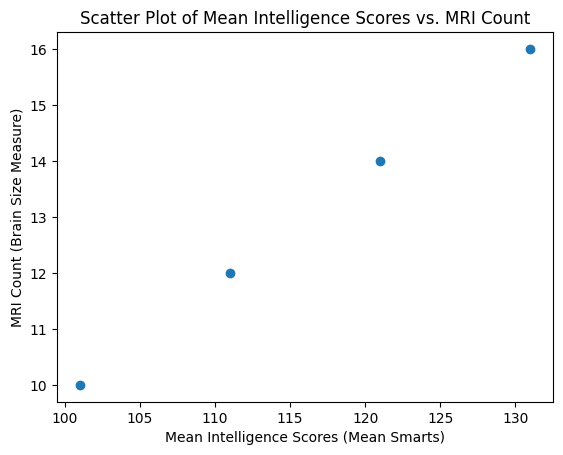

In [73]:

# Предположим, что menDf уже создан и содержит нужные данные

# 1. Вычисляем среднее значение для PIQ, FSIQ и VIQ
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)

# 2. Создаем график рассеяния
plt.scatter(menMeanSmarts, menDf["MRI_Count"])

# 3. Настраиваем оси и заголовок (по желанию)
plt.xlabel('Mean Intelligence Scores (Mean Smarts)')
plt.ylabel('MRI Count (Brain Size Measure)')
plt.title('Scatter Plot of Mean Intelligence Scores vs. MRI Count')

# 4. Отображаем график
plt.show()


Аналогичным образом создайте график диаграммы рассеяния для кадра данных, содержащему только женские записи.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Фильтруем данные для мужчин и женщин
menDf = brainFrame[brainFrame['Gender'] == 'Male']
womenDf = brainFrame[brainFrame['Gender'] == 'Female']

# 1. Вычисляем среднее значение для PIQ, FSIQ и VIQ для женщин
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)

# 2. Создаем график рассеяния
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

# 3. Настраиваем оси и заголовок
plt.xlabel('Mean Intelligence Scores (Mean Smarts)')
plt.ylabel('MRI Count (Brain Size Measure)')
plt.title('Scatter Plot of Mean Intelligence Scores vs. MRI Count for Women')

# 4. Отображаем график
plt.show()



KeyError: 'Gender'

## Часть 3: Вычисление корреляции с Python


#### Шаг 1: Рассчитайте корреляцию для brainFrame.
Метод `corr()` библиотеки pandas обеспечивает простой способ вычисления корреляции для кадра данных. Просто применяя метод на кадре данных, можно получить корреляцию между всеми переменными одновременно.

In [100]:

import pandas as pd

correlation_matrix = brainFrame.corr(method='pearson')

print(correlation_matrix)


ValueError: could not convert string to float: 'Female\t133\t132\t124\t118\t64.5\t816932'

Обратите внимание на диагональ слева направо в таблице корреляции, сгенерированной выше. Почему диагональ заполнена значениями 1? Это совпадение? Объясните.

(ответ)

Продолжая смотреть на таблицу корреляции выше, обратите внимание, что значения зеркалируются; значения под диагональю имеют зеркальный аналог над ней. Это совпадение? Объясните.

(ответ)

Используя тот же метод `corr()`, вычислите корреляцию переменных, содержащихся в кадре с женскими записями:

In [99]:

womenDf.corr(method='pearson')




NameError: name 'womenDf' is not defined

И то же самое можно сделать для переменных, содержащихся в кадре с мужскими записями:

In [98]:
# Вычисление корреляции для мужчин
correlation_matrix_men = menDf.corr(method='pearson')

# Выводим матрицу корреляции
print(correlation_matrix_men)


           PIQ  FSIQ  VIQ  MRI_Count
PIQ        1.0   1.0  1.0        1.0
FSIQ       1.0   1.0  1.0        1.0
VIQ        1.0   1.0  1.0        1.0
MRI_Count  1.0   1.0  1.0        1.0


## Часть 4: Визуализация

#### Шаг 1: Установите Seaborn.
Чтобы упростить визуализацию корреляций данных, можно использовать тепловую карту. На основе цветных квадратов тепловая карта может помочь выявить корреляции с первого взгляда.

Модуль Python с именем `seaborn` очень упрощает построение тепловых карт.

Сначала запустите ячейку ниже, чтобы загрузить и установить модуль `seaborn`. (закомментируйте, если библиотека установлена)

In [97]:
# Ячейка для кода № 11
!pip install seaborn

     ------------------------------------ 294.9/294.9 kB 569.3 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Шаг 2: Нарисуйте корреляционную тепловую карту.

Теперь, когда кадры данных готовы, можно отобразить тепловые карты. Далее приведен анализ кода из ячейки ниже:

Строка 1: Создает таблицу корреляции, основанную на фрейме данных `womenNoGenderDf` и хранит его в `wcorr`.<br>
Строка 2: Использует метод `heatmap()` библиотеки `seaborn` для генерации и построения тепловой карты. Обратите внимание, что `heatmap()` принимает `wcorr`, как параметр.<br>
Строка 3: используется для экспорта и сохранения созданной тепловой карты в виде PNG-изображения. Хотя строка 3 не активна (перед ней стоит символ `#`, заставляя интерпретатор игнорировать ее), она сохранена в информационных целях.

In [108]:
# Ячейка для кода № 12
import seaborn as sns

wcorr = womenDf.corr()

plt.figure(figsize=(10, 8))  # Опционально: задаем размер фигуры
sns.heatmap(wcorr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
#plt.savefig('attribute_correlations.png', tight_layout=True)
plt.show()

NameError: name 'womenDf' is not defined

Аналогичным образом создайте и отобразите тепловую карту для кадра данных с мужчинами.

In [ ]:
# Ячейка для кода № 14
mcorr = ???
#
#

У многих пар переменных корреляция близка к нулю. Что это значит?

(ответ)

Зачем делать разделение по полу?

(ответ)

Какие переменные имеют более сильную корреляцию с размером мозга (MRI_Count)? Это ожидалось? Объясните.

(ответ)